<a href="https://colab.research.google.com/github/hitheeshchowdary/2311CS020477-SIGMA/blob/main/2311CS020477_DAY_20_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Day 20_E-Commerce_Data.csv to Day 20_E-Commerce_Data (1).csv
   Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0         1         Clothing         3262.0          58.0     3.0   
1         2         Clothing          214.0          20.0     3.0   
2         3       Home Decor         3429.0          51.0     2.0   
3         4            Books         4568.0          35.0     3.0   
4         5      Electronics         2237.0          32.0     4.0   

           Review_Text  Order_Date  
0  Would not recommend  2023-01-01  
1   Excellent product!  2023-01-02  
2      Value for money  2023-01-03  
3      Value for money  2023-01-04  
4      Not as expected  2023-01-05  
Missing values:
 Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
Duplicated reviews:
      Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0           

<ipython-input-2-14735c5c6abc>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
<ipython-input-2-14735c5c6abc>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

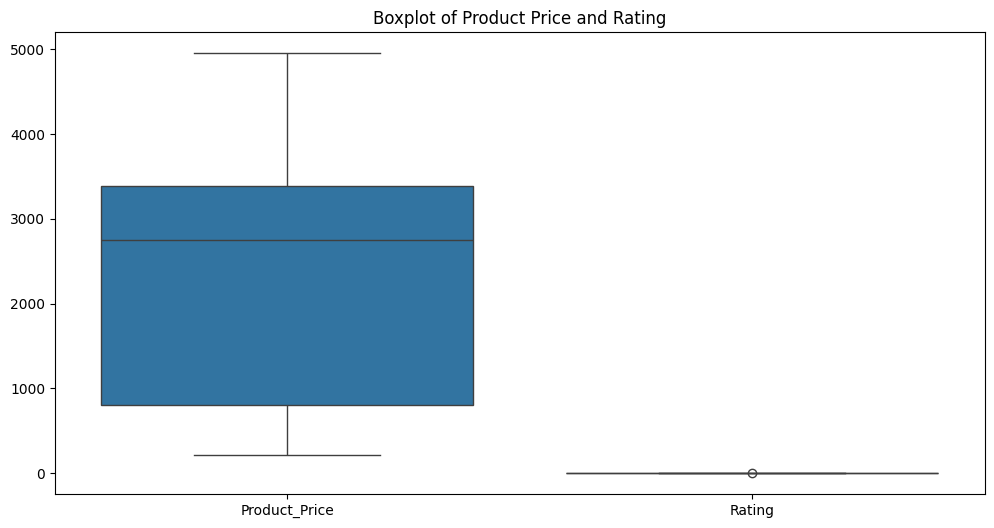

Data cleaning and preparation complete. Cleaned data saved as 'cleaned_customer_reviews.csv'.


In [2]:
from google.colab import files
uploaded = files.upload()


   Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0         1         Clothing         3262.0          58.0     3.0   
1         2         Clothing          214.0          20.0     3.0   
2         3       Home Decor         3429.0          51.0     2.0   
3         4            Books         4568.0          35.0     3.0   
4         5      Electronics         2237.0          32.0     4.0   

           Review_Text  Order_Date  
0  Would not recommend  2023-01-01  
1   Excellent product!  2023-01-02  
2      Value for money  2023-01-03  
3      Value for money  2023-01-04  
4      Not as expected  2023-01-05  
Missing values:
 Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
Duplicated reviews:
      Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
0           1         Clothing         3262.0          58.0     3.0   
1        

<ipython-input-3-73b0c14710ea>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
<ipython-input-3-73b0c14710ea>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

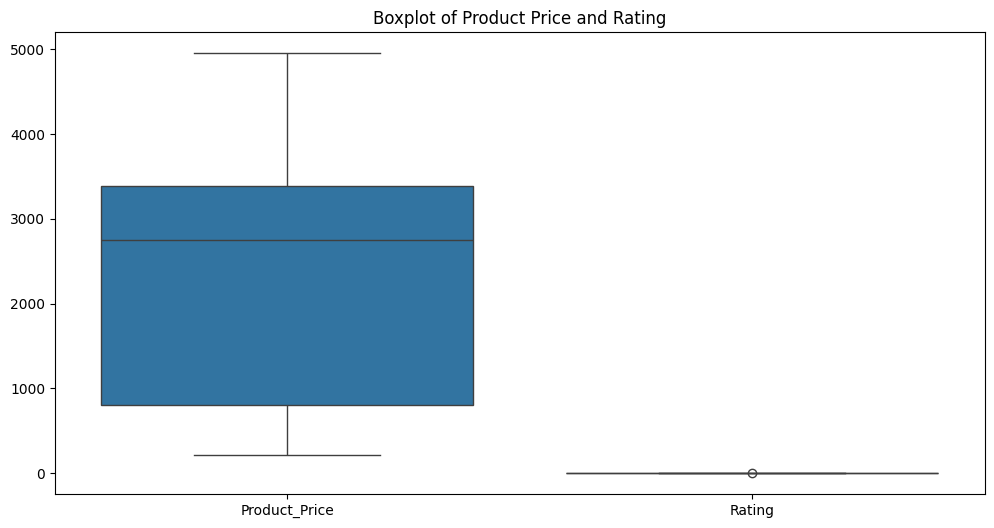

Data cleaning and preparation complete. Cleaned data saved as 'cleaned_customer_reviews.csv'.


In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Day 20_E-Commerce_Data.csv')

print(df.head())
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)
df['Review_Text'].fillna('No review provided', inplace=True)

duplicates = df[df.duplicated(subset=['Review_Text'], keep=False)]
print("Duplicated reviews:\n", duplicates)


df.drop_duplicates(subset=['Review_Text'], inplace=True)
df['Rating'] = df['Rating'].clip(lower=1, upper=5)
df['Product_Category'] = df['Product_Category'].str.lower().str.strip()
df['Product_Category'] = df['Product_Category'].replace({
    'electronics': 'Electronics',
    'home appliance': 'Home Appliance',
    'clothing': 'Clothing',
    'books': 'Books'
})

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Product_Price', 'Rating']])
plt.title('Boxplot of Product Price and Rating')
plt.show()

Q1 = df['Product_Price'].quantile(0.25)
Q3 = df['Product_Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Product_Price'] >= (Q1 - 1.5 * IQR)) & (df['Product_Price'] <= (Q3 + 1.5 * IQR))]

label_encoder = LabelEncoder()
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])
df.to_csv('cleaned_customer_reviews.csv', index=False)
print("Data cleaning and preparation complete. Cleaned data saved as 'cleaned_customer_reviews.csv'.")